In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from wordcloud import WordCloud
import re
from urllib.parse import urlparse
from googlesearch import search
import os
import os.path
from tld import get_tld
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('balanced_urls.csv')
df.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [3]:
df.shape

(632508, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632508 entries, 0 to 632507
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     632508 non-null  object
 1   label   632508 non-null  object
 2   result  632508 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 14.5+ MB


In [5]:
df.isnull().values.any()

False

In [7]:
df.apply(pd.isnull).sum()

url       0
label     0
result    0
dtype: int64

In [9]:
df['label'].value_counts()

label
benign       316254
malicious    316254
Name: count, dtype: int64

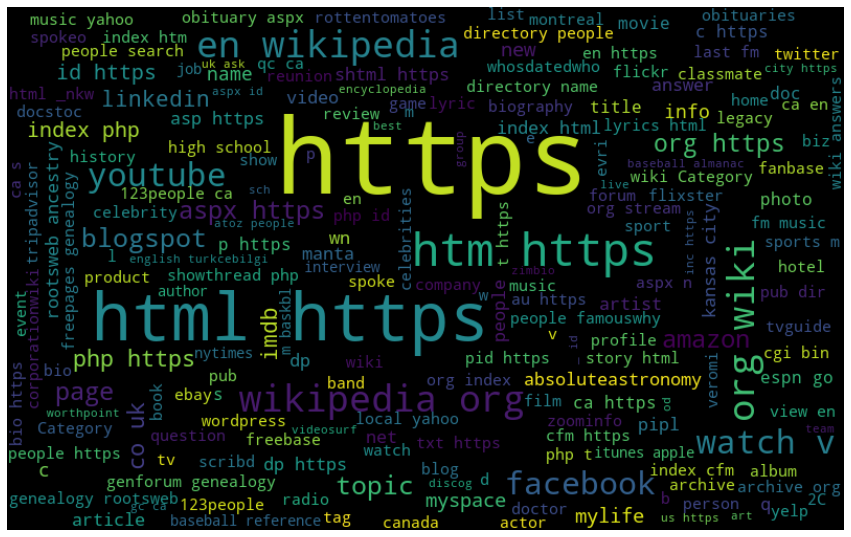

In [11]:
plt.figure(figsize=(15,19))
ben=' '.join([sentence for sentence in df['url'][df['label']=='benign']])
wordcloud_ben=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(ben)
plt.imshow(wordcloud_ben,interpolation='bilinear')
plt.axis('off')
plt.show()

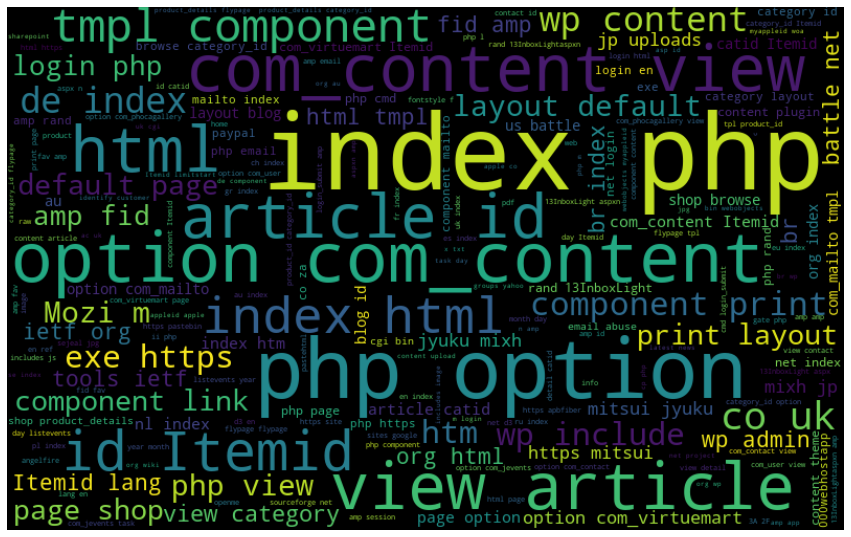

In [12]:
plt.figure(figsize=(15,19))
mal=' '.join(df['url'][df['label']=='malicious'].tolist())
wordcloud_mal=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(mal)
plt.imshow(wordcloud_mal,interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
def having_ip_address(url):
    # Use of IP or not in domain
    match=re.search(
    '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
    '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' #IPv4
    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url) # IPv6
    if match:
        return 1
    else:
        return 0
df['use_of_ip']=df['url'].apply(lambda i:having_ip_address(i))

In [15]:
def google_index(url):
    site=search(url,5)
    return 1 if site else 0
df['google_index']=df['url'].apply(lambda i:google_index(i))

In [16]:
def count_dot(url):
    count_dot=url.count('.')
    return count_dot
df['count_dot']=df['url'].apply(lambda i:count_dot(i))

In [17]:
df.sample(5)

,url,label,result,use_of_ip,google_index,count_dot
384556,http://stoveegol.com/wyj5rku,malicious,1,0,1,1
119122,https://www.becomeagametester.com/?hop=click2info,benign,0,0,1,2
630654,games.groups.yahoo.com/group/rebeccahsmaisonde...,malicious,1,0,1,3
562218,https://www-poloniex.net/,malicious,1,0,1,1
424823,epconengg.com,malicious,1,0,1,1


In [18]:
def count_www(url):
    count_www=url.count('www')
    return count_www
df['count_www']=df['url'].apply(lambda i:count_www(i))

In [20]:
def count_atrate(url):
    count_atrate=url.count('@')
    return count_atrate
df['count_atrate']=df['url'].apply(lambda i:count_atrate(i))

In [30]:
def no_of_dir(url):
    urldir=urlparse(url).path
    return urldir.count('/')
df['count_dir']=df['url'].apply(lambda i:no_of_dir(i))

In [33]:
def no_of_embed(url):
    urldir=urlparse(url).path
    return urldir.count('//')
df['count_embed_domain']=df['url'].apply(lambda i:no_of_embed(i))

In [34]:
def shortening_service(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                   'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                   'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                   'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                   'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im'
                   'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                   'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tewwz\.me|v\.gd|'
                   'tr\.im|link\.zip\.net',url)
    if match:
        return 1
    else:
        return 0
df['short_url']=df['url'].apply(lambda i:shortening_service(i))

In [35]:
def http_count(url):
    return url.count('http')
df['http_count']=df['url'].apply(lambda i:http_count(i))

In [36]:
def https_count(url):
    return url.count('https')
df['https_count']=df['url'].apply(lambda i:https_count(i))

In [37]:
def per_count(url):
    return url.count('%')
df['per_count']=df['url'].apply(lambda i:per_count(i))

In [38]:
def quest_count(url):
    return url.count('?')
df['quest_count']=df['url'].apply(lambda i:quest_count(i))

In [39]:
def count_hyphen(url):
    return url.count('-')
df['count_hyphen']=df['url'].apply(lambda i:count_hyphen(i))

In [40]:
def count_equal(url):
    return url.count('=')
df['count_equal']=df['url'].apply(lambda i:count_equal(i))

In [41]:
def url_length(url):
    return len(str(url))
df['url_length']=df['url'].apply(lambda i:url_length(i))

In [42]:
df.sample(5)

,url,label,result,use_of_ip,google_index,count_dot,count_www,count_atrate,count_dir,count_embed_domain,short_url,http_count,https_count,per_count,quest_count,count_hyphen,count_equal,url_length
86986,https://www.webinformation.co/www.transdev.ca,benign,0,0,1,4,2,0,1,0,0,1,1,0,0,0,0,45
584801,lox1.loxinfo.co.th/~kultana/,malicious,1,0,1,3,0,0,2,0,0,0,0,0,0,0,0,28
438783,http://www.cms01.global-partners.co.jp/jigyo.html,malicious,1,0,1,5,1,0,1,0,0,1,0,0,0,1,0,49
287712,https://www.veromi.com/FL/Ron-Sparks.aspx,benign,0,0,1,3,1,0,2,0,0,1,1,0,0,1,0,41
310430,https://www.dcs.hull.ac.uk/public/genealogy/ro...,benign,0,0,1,5,1,0,4,0,0,1,1,0,0,0,0,62


In [43]:
def suspicious_word(url):
    match=re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',url)
    if match:
        return 1
    else:
        return 0
df['sus_url']=df['url'].apply(lambda i:suspicious_word(i))

In [44]:
def digit_count(url):
    digits=0
    for i in url:
        if i.isnumeric():
            digits+=1
        return digits
df['count_digits']=df['url'].apply(lambda i:digit_count(i))

In [47]:
def letter_count(url):
    letters=0
    for i in url:
        if i.isalpha():
            letters+=1
            return letters
df['letter_count']=df['url'].apply(lambda i:letter_count(i))

In [48]:
df.sample(5)

,url,label,result,use_of_ip,google_index,count_dot,count_www,count_atrate,count_dir,count_embed_domain,...,http_count,https_count,per_count,quest_count,count_hyphen,count_equal,url_length,sus_url,count_digits,letter_count
96528,https://www.absoluteastronomy.com/topics/Calde...,benign,0,0,1,2,1,0,2,0,...,1,1,0,0,0,0,57,0,0,1.0
37665,https://www.liveespntv.com/nhl/dallas-stars-mo...,benign,0,0,1,3,1,0,2,0,...,1,1,0,0,12,0,131,0,0,1.0
31486,https://www.jacksonville.craigslist.org/muc/,benign,0,0,1,3,1,0,2,0,...,1,1,0,0,0,0,44,0,0,1.0
431052,http://www.photoremote.de/de/downloadcenter,malicious,1,0,1,2,1,0,2,0,...,1,0,0,0,0,0,43,0,0,1.0
335787,http://tigadiva.co.id/oo/hbb/hbb/hbb/,malicious,1,0,1,2,0,0,5,0,...,1,0,0,0,0,0,37,0,0,1.0


In [49]:
def fd_length(url):
    urlpath=urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd_length']=df['url'].apply(lambda i:fd_length(i))

In [52]:
df['tld']=df['url'].apply(lambda i:get_tld(i,fail_silently=True))

In [53]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length']=df['url'].apply(lambda i:tld_length(i))

In [54]:
df.drop(columns=['tld'],axis='columns',inplace=True)

In [55]:
df.sample(5)

,url,label,result,use_of_ip,google_index,count_dot,count_www,count_atrate,count_dir,count_embed_domain,...,per_count,quest_count,count_hyphen,count_equal,url_length,sus_url,count_digits,letter_count,fd_length,tld_length
503488,http://www.proagroin.org/en/services/our-servi...,malicious,1,0,1,3,1,0,3,0,...,0,1,1,3,83,1,0,1.0,2,83
304441,https://www.youtube.com/watch?v=YoAnEegiBDw,benign,0,0,1,2,1,0,1,0,...,0,1,0,1,43,0,0,1.0,5,43
205533,https://www.linkedin.com/pub/dir/+/Gervais/+/,benign,0,0,1,2,1,0,6,0,...,0,0,0,0,45,0,0,1.0,3,45
484449,houssaur.beget.tech,malicious,1,0,1,2,0,0,0,0,...,0,0,0,0,19,0,0,1.0,0,19
37519,https://www.listsearches.rootsweb.com/th/read/...,benign,0,0,1,3,1,0,5,0,...,0,0,1,0,70,0,0,1.0,2,70


In [56]:
df.columns

Index(['url', 'label', 'result', 'use_of_ip', 'google_index', 'count_dot',
       'count_www', 'count_atrate', 'count_dir', 'count_embed_domain',
       'short_url', 'http_count', 'https_count', 'per_count', 'quest_count',
       'count_hyphen', 'count_equal', 'url_length', 'sus_url', 'count_digits',
       'letter_count', 'fd_length', 'tld_length'],
      dtype='object')

In [57]:
df.shape

(632508, 23)

In [58]:
df['label'].value_counts()

label
benign       316254
malicious    316254
Name: count, dtype: int64

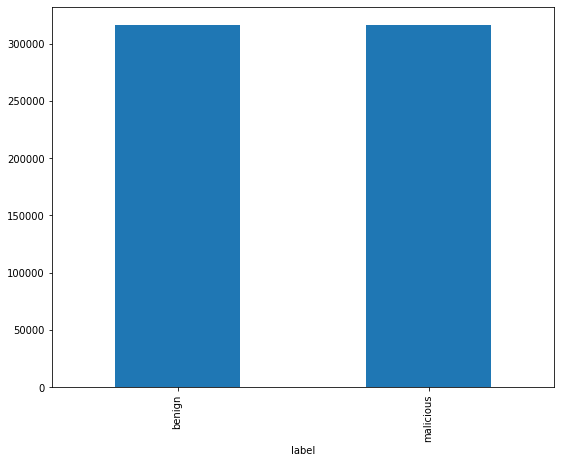

In [60]:
plt.figure(figsize=(9,7))
df['label'].value_counts().plot(kind='bar')
plt.show()

In [63]:
for i in df.columns:
    print(i,'=',df[i].unique())

url = ['https://www.google.com' 'https://www.youtube.com'
 'https://www.facebook.com' ...
 'www.gamespot.com/xbox360/action/deadspace/'
 'en.wikipedia.org/wiki/Dead_Space_(video_game)'
 'www.angelfire.com/goth/devilmaycrytonite/']
label = ['benign' 'malicious']
result = [0 1]
use_of_ip = [0 1]
google_index = [1]
count_dot = [ 2  3  4  5  6  7  8 11 10  9 14 12 16 15 18 13 19 28 22  1 17 25 26 21
 27 30 24 20 23 29  0 32 42]
count_www = [1 2 3 6 5 0 4]
count_atrate = [ 0  1  2  3  6  4  8  5 11 10  7]
count_dir = [ 0  2  3  4  1  6 10  5  7  8  9 11 15 12 13 16 14 19 22 21 20 18 17 25
 39 24]
count_embed_domain = [0 1 2 3 5]
short_url = [0 1]
http_count = [ 1  2  0  3 10  4  5  7  6  8  9]
https_count = [1 0 2 3 4 5 8]
per_count = [  0   1   4   2   7   3   6   5   8   9  10  21  28  15  12  29  18  16
  32  27  22  24  11  14  13  26  31  20  33  19  23  25  39  55  17  44
 134  40  67  51  37  66  30  87  90  36  34  52  53  93  57  46  41  47
  86  49  50  38  43  60  35  79  84  69 

In [65]:
df['letter_count'].value_counts()

letter_count
1.0    632504
Name: count, dtype: int64

In [66]:
df['google_index'].value_counts()

google_index
1    632508
Name: count, dtype: int64

In [67]:
df.drop(columns=['letter_count','google_index'],axis=1,inplace=True)

In [68]:
df['result'].value_counts()

result
0    316254
1    316254
Name: count, dtype: int64

In [69]:
df.drop(columns=['result'],axis=1,inplace=True)

In [70]:
cols1=['use_of_ip','sus_url','count_digits']

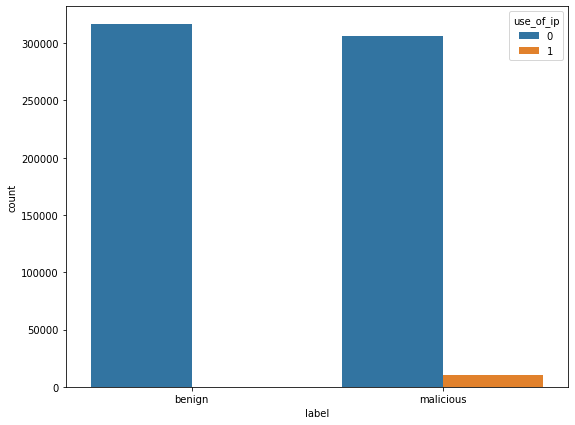

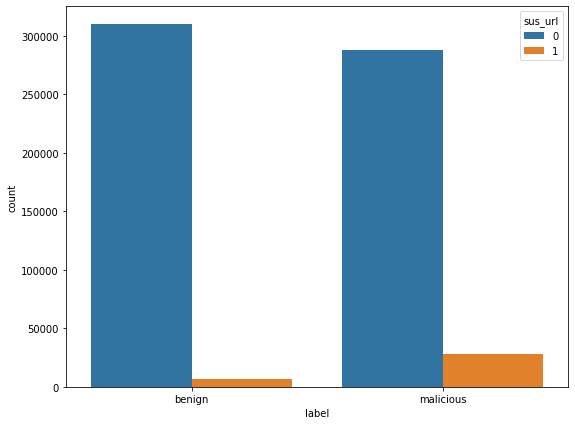

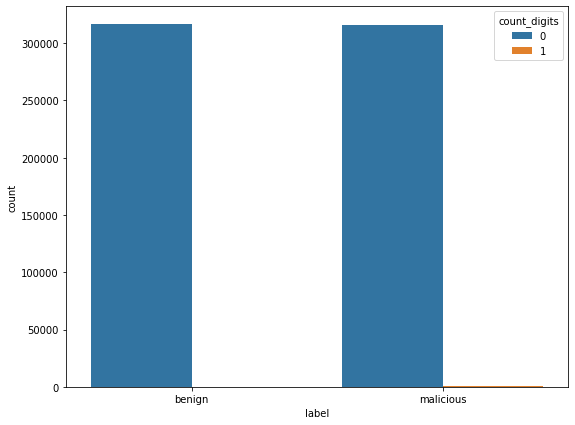

In [71]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.countplot(data=df,x='label',hue=i)
    plt.show()

In [74]:
cols2=['count_dot',
       'count_www', 'count_atrate', 'count_dir', 'count_embed_domain',
       'short_url', 'http_count', 'https_count', 'per_count', 'quest_count',
       'count_hyphen', 'count_equal', 'url_length','fd_length', 'tld_length']

<Figure size 648x504 with 0 Axes>

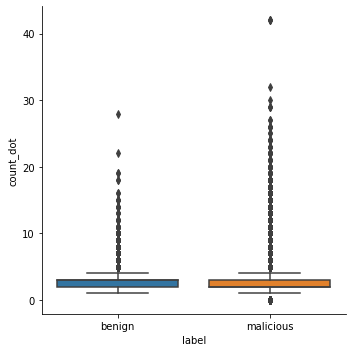

<Figure size 648x504 with 0 Axes>

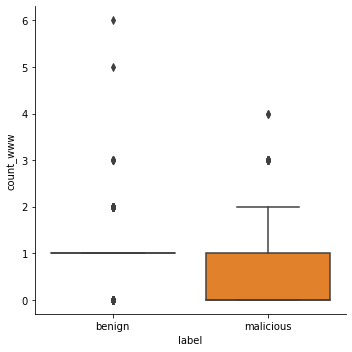

<Figure size 648x504 with 0 Axes>

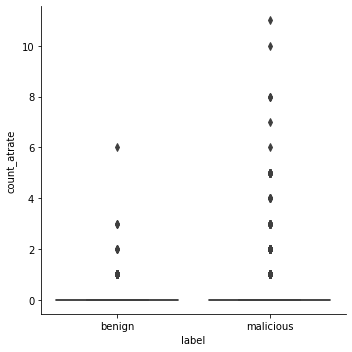

<Figure size 648x504 with 0 Axes>

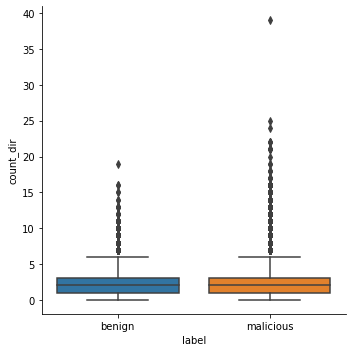

<Figure size 648x504 with 0 Axes>

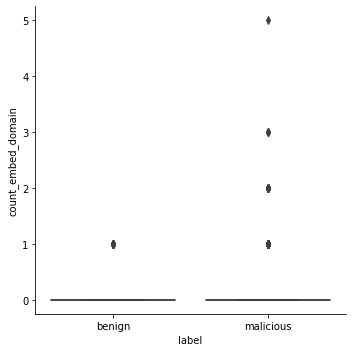

<Figure size 648x504 with 0 Axes>

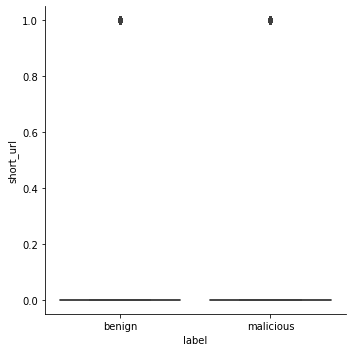

<Figure size 648x504 with 0 Axes>

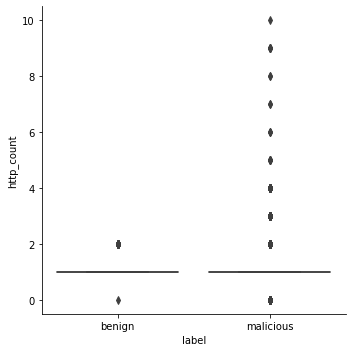

<Figure size 648x504 with 0 Axes>

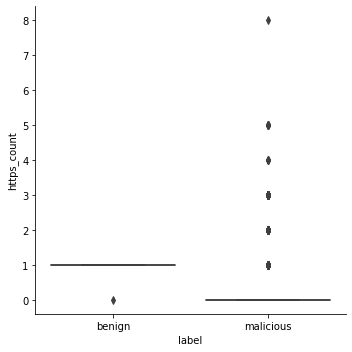

<Figure size 648x504 with 0 Axes>

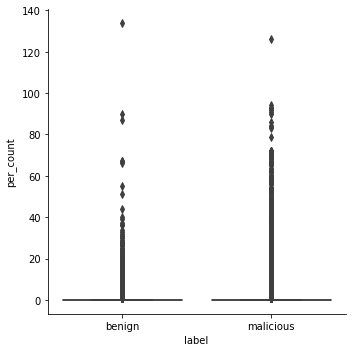

<Figure size 648x504 with 0 Axes>

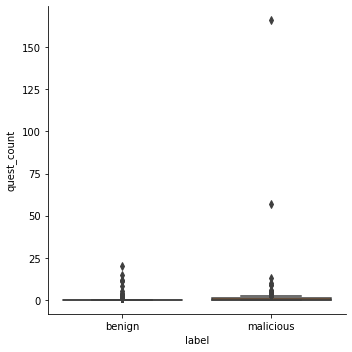

<Figure size 648x504 with 0 Axes>

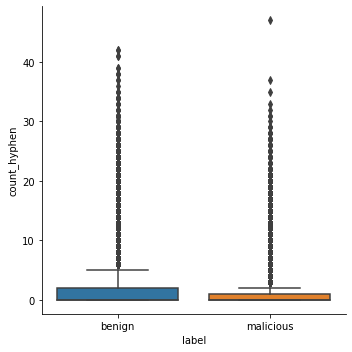

<Figure size 648x504 with 0 Axes>

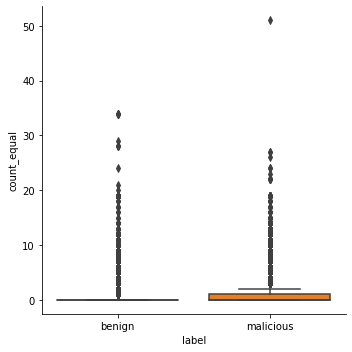

<Figure size 648x504 with 0 Axes>

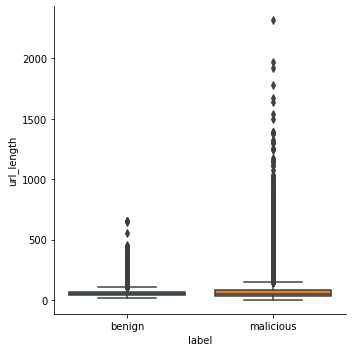

<Figure size 648x504 with 0 Axes>

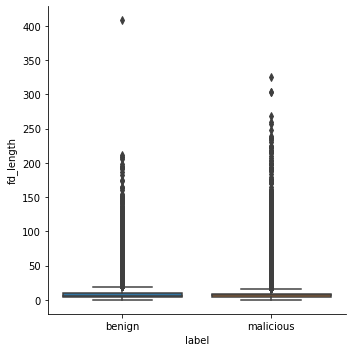

<Figure size 648x504 with 0 Axes>

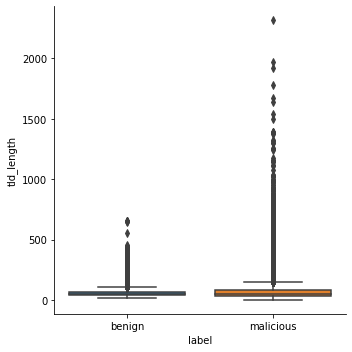

In [75]:
for i in cols2:
    plt.figure(figsize=(9,7))
    sns.catplot(data=df,x='label',y=i,kind='box')
    plt.show()

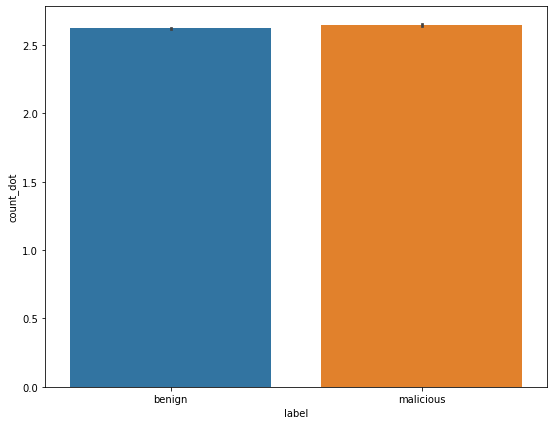

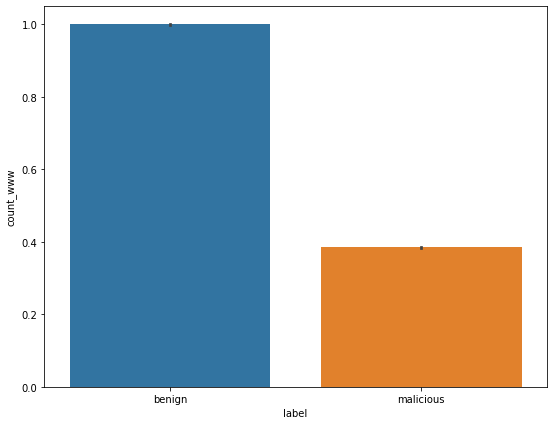

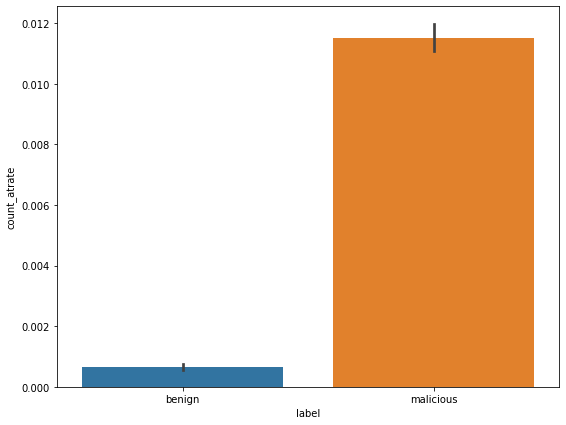

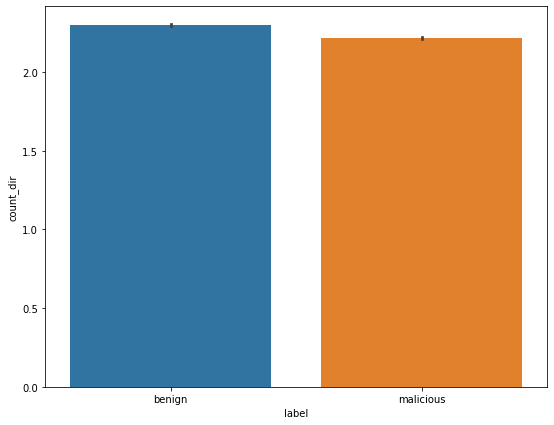

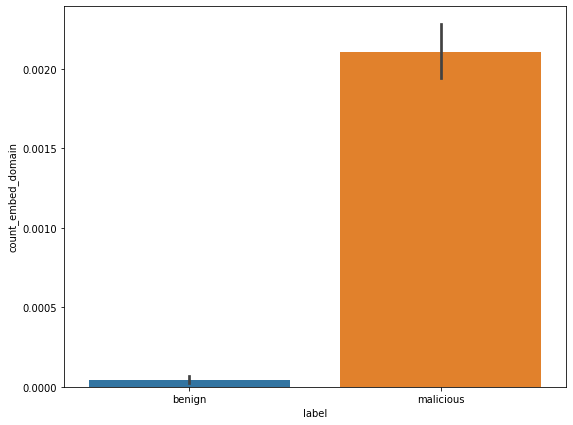

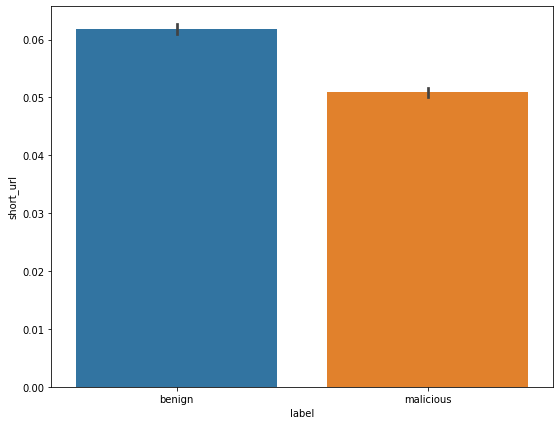

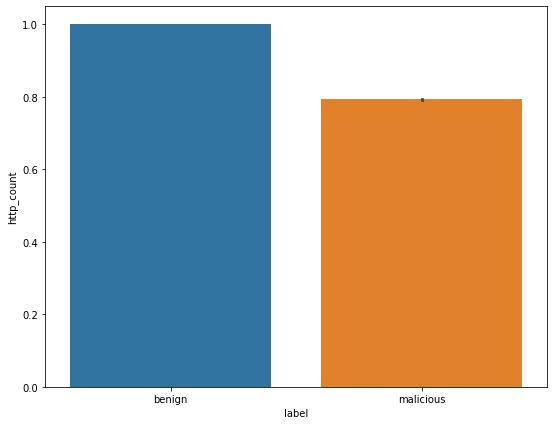

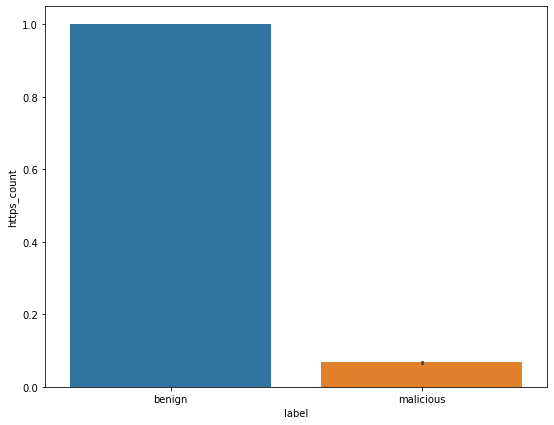

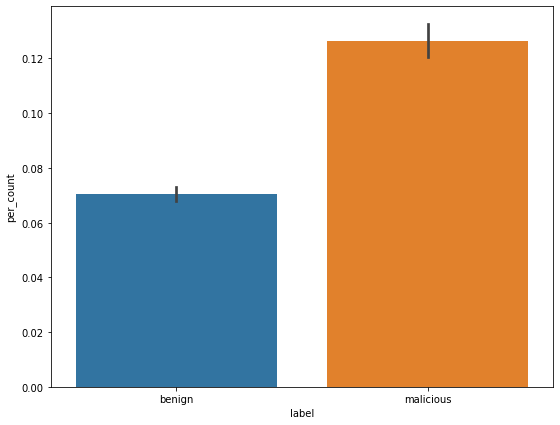

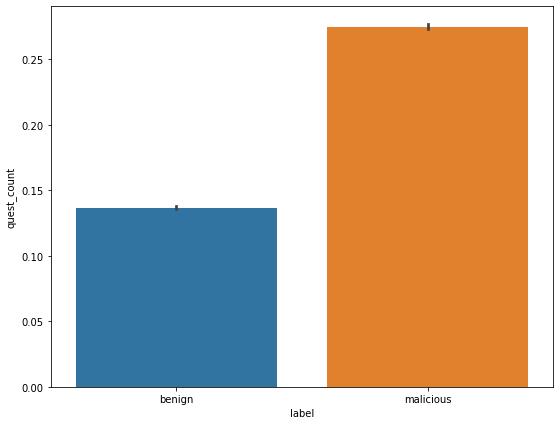

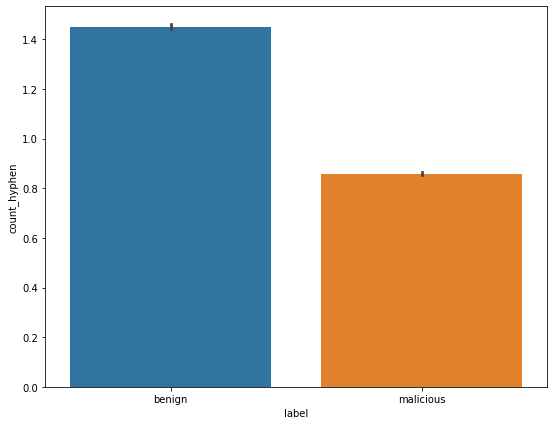

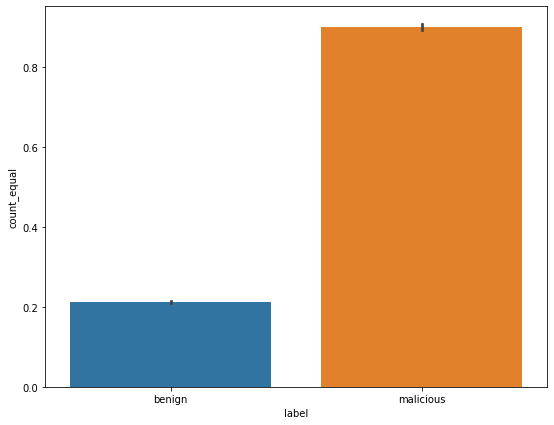

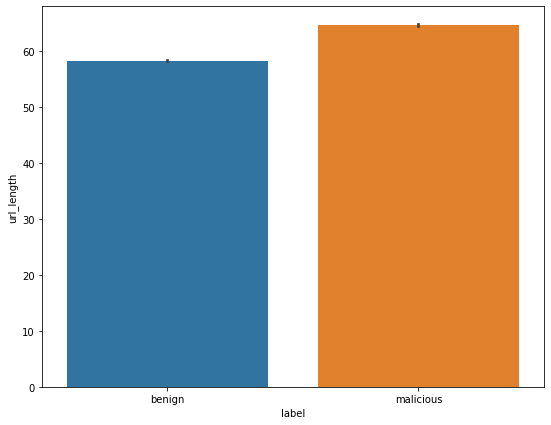

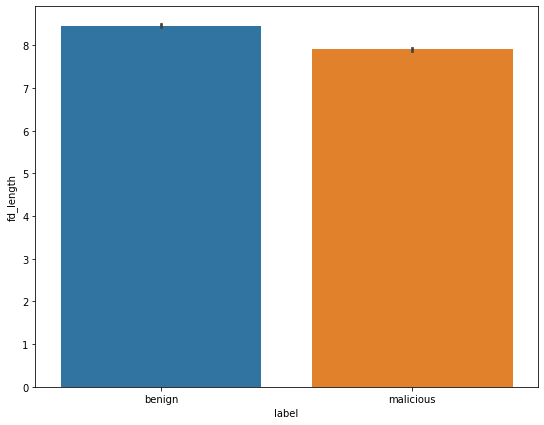

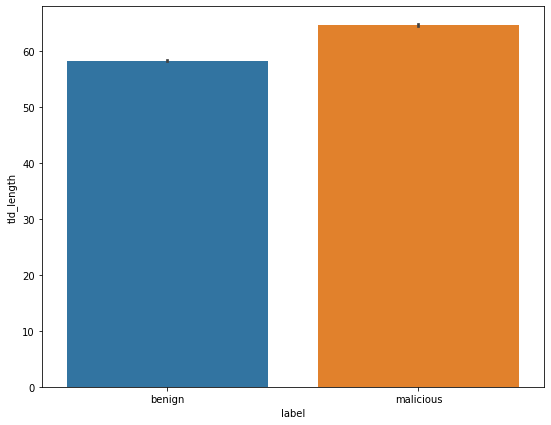

In [76]:
for i in cols2:
    plt.figure(figsize=(9,7))
    sns.barplot(data=df,x='label',y=i)
    plt.show()

In [77]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [78]:
df['label'].value_counts()

label
0    316254
1    316254
Name: count, dtype: int64

In [80]:
df.sample(5)

,url,label,use_of_ip,count_dot,count_www,count_atrate,count_dir,count_embed_domain,short_url,http_count,https_count,per_count,quest_count,count_hyphen,count_equal,url_length,sus_url,count_digits,fd_length,tld_length
52829,https://www.olga.utma.com/index_files/Page1061...,0,0,4,1,0,2,0,0,1,1,0,0,0,0,50,0,0,11,50
62384,https://www.radarurl.com/index-profile/A/106,0,0,2,1,0,3,0,0,1,1,0,0,1,0,44,0,0,13,44
458178,http://www.fzg-eu.de/index.php?option=com_jfor...,1,0,3,1,0,1,0,0,1,0,0,1,1,4,73,0,0,9,73
487091,info21057551000f.000webhostapp.com,1,0,2,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,34
601733,maczealots.com/articles/podcasting/,1,0,1,0,0,3,0,0,0,0,0,0,0,0,35,0,0,8,35


In [81]:
X=df.drop(columns=['url','label'],axis='columns')
y=df['label']

In [83]:
X.head()

,use_of_ip,count_dot,count_www,count_atrate,count_dir,count_embed_domain,short_url,http_count,https_count,per_count,quest_count,count_hyphen,count_equal,url_length,sus_url,count_digits,fd_length,tld_length
0,0,2,1,0,0,0,0,1,1,0,0,0,0,22,0,0,0,22
1,0,2,1,0,0,0,0,1,1,0,0,0,0,23,0,0,0,23
2,0,2,1,0,0,0,0,1,1,0,0,0,0,24,0,0,0,24
3,0,2,1,0,0,0,0,1,1,0,0,0,0,21,0,0,0,21
4,0,2,1,0,0,0,0,1,1,0,0,0,0,25,0,0,0,25


In [84]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify=y,shuffle=True)

In [86]:
len(X_train)

506006

In [87]:
len(X_test)

126502

In [88]:
y_train.value_counts()

label
0    253003
1    253003
Name: count, dtype: int64

In [89]:
y_test.value_counts()

label
1    63251
0    63251
Name: count, dtype: int64

In [93]:
# Random Forest Classifier

In [92]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(classification_report(rf_pred,y_test,target_names=['benign','malicious']))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     63438
   malicious       1.00      1.00      1.00     63064

    accuracy                           1.00    126502
   macro avg       1.00      1.00      1.00    126502
weighted avg       1.00      1.00      1.00    126502



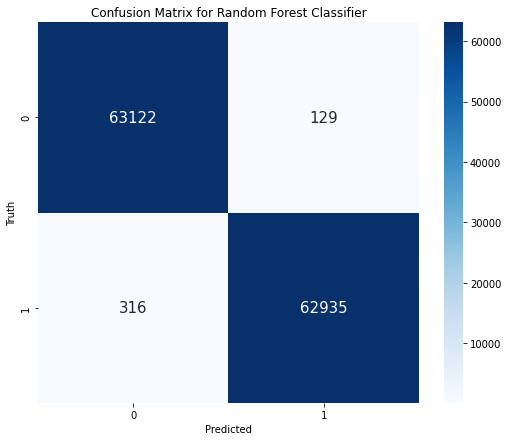

In [94]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<AxesSubplot:>

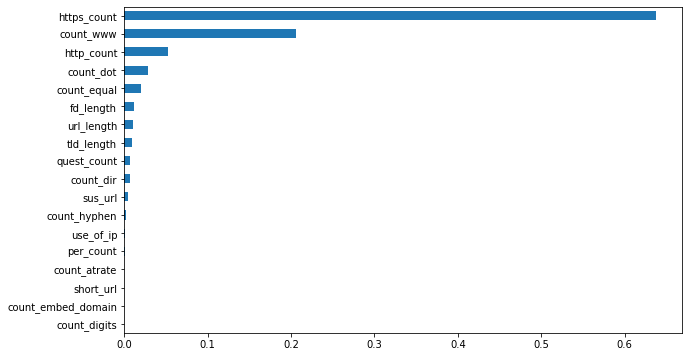

In [95]:
feat_importances_rf=pd.Series(rf.feature_importances_,index=X_train.columns)
feat_importances_rf.sort_values().plot(kind='barh',figsize=(10,6))